#GERMAN TRAFFIC SIGN RECOGNITION

##*The German Traffic Sign Recognition Benchmark (GTSRB) contains 43 classes of traffic signs, split into 39,209 training images and 12,630 test images*

###Importing required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random
from PIL import Image
import glob
import seaborn as sns
import cv2
from sklearn.utils import shuffle
import imagehash
import shutil
from keras.preprocessing.image import ImageDataGenerator
from PIL.Image import LANCZOS
import csv
import json

##TRAINING IMAGES

In [ ]:
#Paths to the image folders
train_folders = [
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00000",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00001",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00002",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00003",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00004",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00005",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00006",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00007",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00008",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00009",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00010",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00011",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00012",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00013",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00014",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00015",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00016",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00017",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00018",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00019",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00020",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00021",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00022",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00023",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00024",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00025",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00026",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00027",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00028",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00029",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00030",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00031",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00032",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00033",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00034",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00035",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00036",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00037",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00038",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00039",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00040",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00041",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00042"
]

In [ ]:
#Image size
image_size = (224, 224)
num_classes = len(train_folders)
num_samples = 0

# Loop through the image folders
for folder in train_folders:
    # Get the list of image filenames in the current folder
    image_filenames = os.listdir(folder)

    # Update the number of samples
    num_samples += len(image_filenames)

    # Choose the number of images to display from each folder
    num_images = 10
    random_images = random.sample(image_filenames, num_images)

    # Create a figure with a single row and the desired number of columns
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    # Loop through the image filenames and display the images
    for i, image_filename in enumerate(random_images):
        image_path = os.path.join(folder, image_filename)
        image = Image.open(image_path)
        image = image.resize(image_size)

        # Display the image in the appropriate subplot
        ax = axes[i]
        ax.imshow(image)
        ax.axis('off')

    # Adjust the spacing between subplots
    plt.tight_layout()
    plt.show()

    # Print the number of samples and classes
print("Number of classes:", num_classes)
print("Number of samples:", num_samples)

In [ ]:
#Path to the dimensions
image_dimensions = {}

# Iterate through each image folder
for folder in train_folders:
    image_filenames = os.listdir(folder)

    # Iterate through each image filename
    for image_filename in image_filenames:
        image_path = os.path.join(folder, image_filename)
        image = Image.open(image_path)
        width, height = image.size
        image_dimensions[image_filename] = (width, height)
        image.close()

# Print the image filenames and their dimensions
for image_filename, dimensions in image_dimensions.items():
    print(f"Image: {image_filename}, Dimensions: {dimensions}")

##TESTING IMAGES

In [ ]:
# Path to the Test data
test_path = r"C:\Users\Dhivya Dhrashini\Downloads\Images_test"

# Get the list of image filenames in the folder with ".ppm" extension
image_filenames = glob.glob(os.path.join(test_path, '*.ppm'))

# Get the number of images present
num_images = len(image_filenames)
print("Number of images:", num_images)

# To display only 20 images
num_images_to_display = 20

# To create a single row with 5 columns
num_columns = 10
fig, axes = plt.subplots(1, num_columns, figsize=(15, 3))

# Loop through the image filenames and display the images
for i in range(min(num_images, num_images_to_display)):
    image_path = image_filenames[i]
    image_test = Image.open(image_path)
    ax = axes[i % num_columns]
    ax.imshow(image_test)
    ax.axis('off')

    # To create a single row with 4 columns
    if (i + 1) % num_columns == 0 or i == num_images_to_display - 1:
        plt.tight_layout()
        plt.show()
        if i == num_images_to_display - 1:
            break
        else:
            fig, axes = plt.subplots(1, num_columns, figsize=(15, 3))


##GROUNDTRUTH TABLE

In [ ]:
# Directory path containing the CSV files
directory = r"C:\Users\Dhivya Dhrashini\Downloads\GT"

# List to store the data frames of individual CSV files
csv_dataframes = []

# Loop through the CSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)

        # Read the CSV file into a pandas data frame
        df = pd.read_csv(file_path)

        # Append the data frame to the list
        csv_dataframes.append(df)

# Concatenate all the data frames into a single data frame
combined_df = pd.concat(csv_dataframes, ignore_index=True)

# Path to save the combined CSV file
output_file = r"C:\Users\Dhivya Dhrashini\Downloads\combined.csv"

# Save the combined data frame as a CSV file
combined_df.to_csv(output_file, index=False)

print("Combined CSV file saved successfully.")


In [ ]:
#Path to view the Ground Truth
GT=pd.read_csv(r"C:\Users\Dhivya Dhrashini\Downloads\combined.csv",delimiter=';')
GT.head(20)

In [ ]:
GT.tail(20)

##VISUALIZING THE CLASSES

In [ ]:
#Visualizing tha ClassId
plt.figure(figsize=(15, 5))
classes=GT['ClassId'].value_counts().index
sns.countplot(data=GT, x='ClassId', order=classes)
plt.title('Classes')
plt.xlabel('ClassID')
plt.ylabel('Count')

##UNDERSAMPLING

###UnderSampling is done by removing random images to the desired target count

In [ ]:
import os
import random
import shutil

# Function to undersample images in a folder
def undersample_folder(folder_path, target_count):
    # Get the list of image files in the folder
    image_files = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]

    # Check if the target count exceeds the available images
    if target_count >= len(image_files):
        print(f"Skipping undersampling for folder: {folder_path}. Insufficient images for undersampling.")
        return

    # Randomly select images to keep
    images_to_keep = random.sample(image_files, target_count)

    # Create a new folder to save the undersampled images
    save_path = folder_path + "_undersampled"
    os.makedirs(save_path, exist_ok=True)

    # Move the selected images to the new folder
    for image_file in images_to_keep:
        src_path = os.path.join(folder_path, image_file)
        dst_path = os.path.join(save_path, image_file)
        shutil.move(src_path, dst_path)

    print(f"Undersampled images saved to: {save_path}")

# List of folder paths to undersample
folder_paths = [
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00001",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00002",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00003",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00004",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00005",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00007",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00008",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00009",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00010",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00011",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00012",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00013",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00017",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00018",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00025",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00031",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00035",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00038"
]

# Target count of images in each folder
target_count = 780

# Undersample each folder in the list
for folder_path in folder_paths:
    undersample_folder(folder_path, target_count)

##OVERSAMPLING

###OverSampling is done by replicating random images till it reaches the desired target count

In [ ]:
import os
import random
import shutil

# Function to oversample images in a folder
def oversample_folder(folder_path, target_count):
    # Get the list of image files in the folder
    image_files = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]

    # Calculate the current count of images in the folder
    current_count = len(image_files)

    # Check if the target count is already met or exceeded
    if current_count >= target_count:
        print(f"Skipping oversampling for folder: {folder_path}. Current count ({current_count}) is equal to or exceeds the target count.")
        return

    # Calculate the number of additional images needed
    num_images_to_add = target_count - current_count

    # Create a new folder to save the oversampled images
    save_path = folder_path + "_oversampled"
    os.makedirs(save_path, exist_ok=True)

    # Copy existing images to the new folder
    for image_file in image_files:
        src_path = os.path.join(folder_path, image_file)
        dst_path = os.path.join(save_path, image_file)
        shutil.copy2(src_path, dst_path)

    # Replicate existing images to meet the target count
    replicated_count = 0
    while replicated_count < num_images_to_add:
        # Randomly select an image to replicate
        image_to_replicate = random.choice(image_files)
        src_path = os.path.join(folder_path, image_to_replicate)
        new_filename = f"replicated_{random.randint(1, 100000)}_{image_to_replicate}"
        dst_path = os.path.join(save_path, new_filename)
        shutil.copy2(src_path, dst_path)
        replicated_count += 1

    print(f"Oversampled images saved to: {save_path}")

# List of folder paths to oversample
folder_paths = [
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00000",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00006",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00014",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00015",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00016",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00019",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00020",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00021",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00022",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00023",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00024",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00026",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00027",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00028",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00029",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00030",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00032",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00033",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00034",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00036",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00037",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00039",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00040",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00041",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00042"
]

# Target count of images in each folder
target_count = 780

# Oversample each folder in the list
for folder_path in folder_paths:
    oversample_folder(folder_path, target_count)


###VISUALIZING THE BALANCED CLASSES

In [ ]:
#Path of the Balanced Images
folder_paths = [
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00000_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00001_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00002_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00003_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00004_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00005_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00006_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00007_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00008_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00009_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00010_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00011_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00012_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00013_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00014",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00015_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00016_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00017_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00018_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00019_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00020_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00021_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00022_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00023_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00024_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00025_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00026_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00027_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00028_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00029_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00030_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00031",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00032_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00033_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00034_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00035_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00036_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00037_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00038_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00039_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00040_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00041_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00042_oversampled"
]

In [ ]:
import os
import matplotlib.pyplot as plt

# List of folder paths

# Get the count of images in each folder
image_counts = []
for folder_path in folder_paths:
    image_files = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]
    image_counts.append(len(image_files))

# Create the bar chart
plt.figure(figsize=(50, 30))
plt.bar(range(len(folder_paths)), image_counts, align='center')
plt.xticks(range(len(folder_paths)), folder_paths, rotation=90)
plt.xlabel('Folder Paths')
plt.ylabel('Image Count')
plt.title('Image Count in Folders')
plt.tight_layout()

# Display the chart
plt.show()


In [ ]:
#Paths to the image folders
train_folders = [
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00000_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00001_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00002_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00003_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00004_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00005_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00006_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00007_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00008_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00009_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00010_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00011_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00012_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00013_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00014",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00015_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00016_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00017_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00018_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00019_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00020_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00021_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00022_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00023_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00024_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00025_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00026_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00027_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00028_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00029_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00030_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00031",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00032_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00033_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00034_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00035_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00036_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00037_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00038_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00039_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00040_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00041_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00042_oversampled"
]

#Image size
image_size = (224, 224)
num_classes = len(train_folders)
num_samples = 0


# Loop through the image folders
for folder in train_folders:
    # Get the list of image filenames in the current folder
    image_filenames = os.listdir(folder)

    # Update the number of samples
    num_samples += len(image_filenames)

    # Choose the number of images to display from each folder
    num_images = 10
    random_images = random.sample(image_filenames, num_images)

    # Create a figure with a single row and the desired number of columns
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    # Loop through the image filenames and display the images
    for i, image_filename in enumerate(random_images):
        image_path = os.path.join(folder, image_filename)
        image = Image.open(image_path)
        image = image.resize(image_size)

        # Display the image in the appropriate subplot
        ax = axes[i]
        ax.imshow(image)
        ax.axis('off')

    # Adjust the spacing between subplots
    plt.tight_layout()
    plt.show()

    # Print the number of samples and classes
print("Number of classes:", num_classes)
print("Number of samples:", num_samples)

#DATA PREPROCESSING

##IMAGE ENHANCEMENT
#It is done by applying Multiscale Logarithmic Transformation

In [ ]:
import cv2
import numpy as np
import os

def enhance_images(folder_paths, output_folders):
    for i, folder_path in enumerate(folder_paths):
        # Create the output folder if it doesn't exist
        os.makedirs(output_folders[i], exist_ok=True)

        # Get the list of image files in the folder
        image_files = os.listdir(folder_path)

        # Process each image file
        for image_file in image_files:
            # Get the path of the input image
            image_path = os.path.join(folder_path, image_file)

            # Read the image
            image = cv2.imread(image_path)

            # Convert the image to float32
            image_float = image.astype(np.float32) / 255.0

            # Apply multiscale logarithmic transformation
            enhanced_image = np.log1p(image_float * 10) / np.log1p(10)

            # Convert the enhanced image to uint8
            enhanced_image = (enhanced_image * 255).astype(np.uint8)

            # Apply color restoration
            enhanced_image = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2LAB)
            enhanced_image = cv2.cvtColor(enhanced_image, cv2.COLOR_LAB2BGR)

            # Save the enhanced image to the output folder
            output_path = os.path.join(output_folders[i], image_file)
            cv2.imwrite(output_path, enhanced_image)

            print("Enhanced image saved:", output_path)

# Example usage
folder_paths = [
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00000_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00001_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00002_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00003_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00004_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00005_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00006_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00007_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00008_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00009_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00010_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00011_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00012_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00013_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00014",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00015_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00016_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00017_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00018_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00019_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00020_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00021_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00022_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00023_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00024_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00025_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00026_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00027_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00028_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00029_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00030_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00031",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00032_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00033_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00034_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00035_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00036_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00037_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00038_undersampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00039_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00040_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00041_oversampled",
    r"C:\Users\Dhivya Dhrashini\Downloads\Images_train\00042_oversampled"
]
output_folders = [
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00000",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00001",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00002",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00003",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00004",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00005",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00006",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00007",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00008",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00009",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00010",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00011",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00012",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00013",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00014",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00015",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00016",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00017",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00018",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00019",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00020",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00021",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00022",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00023",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00024",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00025",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00026",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00027",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00028",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00029",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00030",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00031",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00032",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00033",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00034",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00035",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00036",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00037",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00038",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00039",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00040",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00041",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00042"
]

enhance_images(folder_paths, output_folders)


In [ ]:
#Paths to the image folders
train_folders = [
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00000",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00001",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00002",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00003",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00004",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00005",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00006",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00007",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00008",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00009",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00010",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00011",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00012",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00013",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00014",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00015",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00016",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00017",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00018",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00019",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00020",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00021",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00022",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00023",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00024",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00025",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00026",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00027",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00028",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00029",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00030",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00031",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00032",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00033",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00034",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00035",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00036",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00037",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00038",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00039",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00040",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00041",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00042"
]

#Image size
image_size = (224, 224)
num_classes = len(train_folders)
num_samples = 0


# Loop through the image folders
for folder in train_folders:
    # Get the list of image filenames in the current folder
    image_filenames = os.listdir(folder)

    # Update the number of samples
    num_samples += len(image_filenames)

    # Choose the number of images to display from each folder
    num_images = 10
    random_images = random.sample(image_filenames, num_images)

    # Create a figure with a single row and the desired number of columns
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    # Loop through the image filenames and display the images
    for i, image_filename in enumerate(random_images):
        image_path = os.path.join(folder, image_filename)
        image = Image.open(image_path)
        image = image.resize(image_size)

        # Display the image in the appropriate subplot
        ax = axes[i]
        ax.imshow(image)
        ax.axis('off')

    # Adjust the spacing between subplots
    plt.tight_layout()
    plt.show()

    # Print the number of samples and classes
print("Number of classes:", num_classes)
print("Number of samples:", num_samples)

##DATA MAPPING

In [ ]:
folder_paths = [
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00000",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00001",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00002",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00003",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00004",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00005",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00006",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00007",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00008",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00009",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00010",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00011",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00012",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00013",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00014",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00015",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00016",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00017",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00018",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00019",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00020",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00021",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00022",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00023",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00024",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00025",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00026",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00027",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00028",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00029",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00030",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00031",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00032",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00033",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00034",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00035",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00036",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00037",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00038",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00039",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00040",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00041",
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00042"
]

class_names = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

In [ ]:
def coordinate_images_with_class_names(folder_paths, class_names):
    image_class_mapping = {}

    for folder_path, class_name in zip(folder_paths, class_names):
        # Get the list of image files in the folder
        image_files = os.listdir(folder_path)

        # Associate each image file with the class name
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            image_class_mapping[image_path] = class_name

    return image_class_mapping

image_class_mapping = coordinate_images_with_class_names(folder_paths, class_names)

# Print the mapping
for image_path, class_name in image_class_mapping.items():
    print("Image:", image_path)
    print("Class:", class_name)


In [ ]:
# Get the count of images in each folder
image_counts = []
for folder_path in folder_paths:
    image_files = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]
    image_counts.append(len(image_files))

# Create the bar chart
plt.figure(figsize=(20,10))
plt.bar(range(len(folder_paths)), image_counts, align='center')
plt.xticks(range(len(folder_paths)), class_names, rotation=90)
plt.xlabel('class names')
plt.ylabel('Image Count')
plt.title('Image Count in Folders')
plt.tight_layout()

# Display the chart
plt.show()


In [ ]:
# Iterate over each folder
for folder_index, folder_path in enumerate(folder_paths):
    # Get the image files from the folder
    image_files = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]
    if len(image_files) > 0:
        image_file = os.path.join(folder_path, image_files[0])
        # Load and display the image
        image = cv2.imread(image_file)
        if image is not None:
            # Display the image and class name
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title("Class: " + class_names[folder_index])
            plt.axis('off')
            plt.show()

##DATA PREPARATION

###Balancing GroundTruth table for UnderSampled Images

In [ ]:
import pandas as pd
import os

# Read the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\Dhivya Dhrashini\Downloads\combined - Copy.csv", delimiter=";")

# Define the folder paths and class ID mappings
folder_paths_ = {
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00001": 1,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00002": 2,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00003": 3,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00004": 4,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00005": 5,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00007": 7,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00008": 8,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00009": 9,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00010": 10,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00011": 11,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00012": 12,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00013": 13,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00017": 17,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00018": 18,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00025": 25,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00031": 31,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00035": 35,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00038": 38
}

# Create a dictionary to group filenames by class ID
groupby_classid = df.groupby("ClassId")["Filename"].apply(list).to_dict()

# Print the data stored in the groupby_classid dictionary
for class_id, filenames in groupby_classid.items():
    folder_path = next((folder_path for folder_path, id_mapping in folder_paths_.items() if id_mapping == class_id), None)
    if folder_path:
        print("Class ID:", class_id)
        print("Folder Path:", folder_path)
        print("Filenames:", filenames)
        print()



In [ ]:
# Iterate over the folder paths and print the basenames of the images
for folder_path, class_id in folder_paths_.items():
    print("Folder Path:", folder_path)
    print("Class ID:", class_id)

    # Get the list of image files in the folder
    image_files = os.listdir(folder_path)

    # Print the basenames of the images
    print("Image Basenames:")
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        image_basename = os.path.basename(image_path)
        print(image_basename)

    print()

In [ ]:
# Create a dictionary to group filenames by class ID
groupby_classid = df.groupby("ClassId")["Filename"].apply(list).to_dict()

# Create a dictionary to store filenames not present in the image basenames
filenames_not_in_image = {}

# Iterate over the folder paths and find the filenames not in the image basenames
for folder_path, class_id in folder_paths_.items():
    print("Folder Path:", folder_path)
    print("Class ID:", class_id)

    # Get the list of image files in the folder
    image_files = os.listdir(folder_path)

    # Get the basenames of the images
    image_basenames = [os.path.basename(os.path.join(folder_path, image_file)) for image_file in image_files]

    # Get the filenames for the class ID
    filenames = groupby_classid.get(class_id, [])

    # Find the filenames that are not in the image basenames
    filenames_not_in_image[class_id] = [filename for filename in filenames if filename not in image_basenames]
    for filename in filenames_not_in_image[class_id]:
        print("Filename not in image basenames:", filename)

    print()

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\Dhivya Dhrashini\Downloads\combined - Copy.csv", delimiter=";")

# Create a dictionary to group filenames by class ID
groupby_classid = df.groupby("ClassId")["Filename"].apply(list).to_dict()

# Iterate over the class IDs and filenames not present in the image basenames
for class_id, filenames in filenames_not_in_image.items():
    # Get the filenames for the class ID
    class_filenames = groupby_classid.get(class_id, [])

    # Drop the rows corresponding to the filenames not present in the image basenames for the specific class ID
    df = df[~((df['ClassId'] == class_id) & (df['Filename'].isin(filenames)))]

# Save the updated DataFrame to a new CSV file
df.to_csv("undersampling_CSV.csv", index=False)

In [ ]:
df = pd.read_csv(r"undersampling_CSV.csv")
df

###Balanced GroundTruth table for OverSampled Images

In [ ]:
import pandas as pd
import os

# Read the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\Dhivya Dhrashini\Downloads\combined.csv", delimiter=";")

# Define the folder paths and class ID mappings
folder_paths = {
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00000": 0,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00006": 6,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00015": 15,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00016": 16,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00019": 19,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00020": 20,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00021": 21,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00022": 22,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00023": 23,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00024": 24,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00026": 26,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00027": 27,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00028": 28,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00029": 29,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00030": 30,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00032": 32,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00033": 33,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00034": 34,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00036": 36,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00037": 37,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00039": 39,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00040": 40,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00041": 41,
    r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images\00042": 42
}

# Create a dictionary to group filenames by class ID
groupby_classid = df.groupby("ClassId")["Filename"].apply(list).to_dict()

# Print the data stored in the groupby_classid dictionary
for class_id, filenames in groupby_classid.items():
    folder_path = next((folder_path for folder_path, id_mapping in folder_paths.items() if id_mapping == class_id), None)
    if folder_path:
        print("Class ID:", class_id)
        print("Folder Path:", folder_path)
        print("Filenames:", filenames)
        print()

In [ ]:
# Iterate over the folder paths and print the paths of the images
for folder_path, class_id in folder_paths.items():
    print("Folder Path:", folder_path)
    print("Class ID:", class_id)

    # Get the list of image files in the folder
    image_files = os.listdir(folder_path)

    # Print the paths of the images
    print("Image Paths:")
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        image_basename = os.path.basename(image_path)
        print(image_basename)

    print()


In [ ]:
# Create empty lists and dictionaries to store the replicated and non-replicated image names
replicated_image_names = []
non_replicated_image_names = []
grouped_replicated_image_names = {}
grouped_non_replicated_image_names = {}

# Iterate over the folder paths and print the paths of the images
for folder_path, class_id in folder_paths.items():
    print("Folder Path:", folder_path)
    print("Class ID:", class_id)

    # Get the list of image files in the folder
    image_files = os.listdir(folder_path)

    # Print and store the image names that start with "replicated"
    print("Replicated Image Names:")
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        image_name = os.path.basename(image_path)

        if image_name.startswith("replicated"):
            replicated_image_names.append(image_name)
            print(image_name)

            # Group the replicated image names by class ID
            if class_id in grouped_replicated_image_names:
                grouped_replicated_image_names[class_id].append(image_name)
            else:
                grouped_replicated_image_names[class_id] = [image_name]

    # Print and store the image names that do not start with "replicated"
    print("Non-Replicated Image Names:")
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        image_name = os.path.basename(image_path)

        if not image_name.startswith("replicated"):
            non_replicated_image_names.append(image_name)
            print(image_name)

            # Group the  replicated image names by class ID
            if class_id in grouped_non_replicated_image_names:
                grouped_non_replicated_image_names[class_id].append(image_name)
            else:
                grouped_non_replicated_image_names[class_id] = [image_name]
    print()

print(len(grouped_replicated_image_names))
print(len(grouped_non_replicated_image_names))

In [ ]:
groupby_classid = df.groupby("ClassId")["Filename"].apply(list).to_dict()
print(groupby_classid)

In [ ]:
repl_df = pd.DataFrame(columns=["Filename", "ClassId"])

for key, val in grouped_replicated_image_names.items():
    for imgs in val:
        length = len(repl_df)
        if imgs.split('_')[-2]+"_"+imgs.split('_')[-1] in grouped_non_replicated_image_names[key]:
            repl_df = repl_df.append({"Filename": imgs, "ClassId": key}, ignore_index=True)
repl_df


In [ ]:
repl_df.to_csv('replicated_CSV.csv', index=False)

In [ ]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Dhivya Dhrashini\Downloads\undersampled - Copy.csv")
df

In [ ]:
# Read the CSV files
df = pd.read_csv('undersampled - Copy.csv', sep=',')
repl_df = pd.read_csv('replicated_CSV.csv', sep=',')

# Iterate over each row in updated_repl_df
for index, row in repl_df.iterrows():
    filename = row['Filename'][-15:]
    class_id = row['ClassId']

    # Find matching row in undersampled_data
    matching_row = df[(df['Filename'] == filename) & (df['ClassId'] == class_id)]

    # Update the remaining columns if a match is found
    if not matching_row.empty:
        for column in ['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2']:
            repl_df.at[index, column] = matching_row[column].values[0]

# Save the updated DataFrame to a new CSV file
repl_df.to_csv('oversampling_CSV.csv', index=False, sep=',')

###Visualizing Balanced GroundTruth table

In [ ]:
finaldata2 = pd.read_csv(r"C:\Users\Dhivya Dhrashini\Downloads\GT_FINAL.csv")
finaldata2

In [ ]:
#Visualizing tha ClassId
plt.figure(figsize=(15, 5))
classes=finaldata2['ClassId'].value_counts().index
sns.countplot(data=finaldata2, x='ClassId', order=classes)
plt.title('Classes')
plt.xlabel('ClassID')
plt.ylabel('Count')

###Merging Train data pathname to the Ground Truth table

In [ ]:
#Adding image path to csv
# Define the path to the CSV file
csv_file = r"C:\Users\Dhivya Dhrashini\Downloads\GT_FINAL.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Define the base folder path
base_folder_path = r"C:\Users\Dhivya Dhrashini\Downloads\Enhanced_images"

# Iterate through the rows of the DataFrame
for index, row in df.iterrows():
    class_id = row['ClassId']
    filename = row['Filename']

    # Create the prefix based on the ClassId
    prefix = os.path.join(base_folder_path, str(class_id).zfill(5))

    # Update the Filename column based on the ClassId
    if class_id >= 0 and class_id <= 43:
        df.at[index, 'Filename'] = os.path.join(prefix, filename)

# Save the updated DataFrame back to the CSV file
df.to_csv(csv_file, index=False)


In [ ]:
#Printing the Filepath of Images_train in a csv
# Directory path containing the image folders
folder_path = r"C:\Users\Dhivya Dhrashini\Downloads\Images_test"

# CSV file path to save the folder paths
csv_file = r"C:\Users\Dhivya Dhrashini\Downloads\test.csv"

# List to store the image paths
image_paths = []

# Iterate over the files in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.ppm'):  # Adjust file extensions as per your image formats
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Write the image paths to the CSV file
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Image Path'])
    for image_path in image_paths:
        writer.writerow([image_path])

print('Image paths saved to CSV file:', csv_file)

###Mapping Train data to the Filename in the GroudTruth table

In [ ]:
# CSV file path
csv_file = r"C:\Users\Dhivya Dhrashini\Downloads\GT_FINAL.csv"

# Read the CSV file
df = pd.read_csv(csv_file)

# Create a dictionary to store the mappings
mapping = {}

# Iterate through each image folder
for folder in image_folders:
    # Get the folder name
    folder_name = os.path.basename(folder)

    # Filter the DataFrame based on the folder name
    filtered_df = df[df["Filename"].str.contains(folder_name)]

    # Get the corresponding filenames in the folder
    filenames = [os.path.join(folder, filename) for filename in filtered_df["Filename"]]

    # Map the filenames to the folder
    mapping[folder] = filenames

# Print the mappings
for folder, filenames in mapping.items():
    print(f"Folder: {folder}")
    for filename in filenames:
        print(filename)
    print()

###Adding Channels to the GroundTruth table

In [ ]:
import cv2
import pandas as pd

# Load the CSV file containing the image paths
csv_file = r"C:\Users\Dhivya Dhrashini\Downloads\GT_FINAL.csv"
df = pd.read_csv(csv_file)

# Iterate through the rows of the DataFrame
for index, row in df.iterrows():
    # Get the image path from the 'Filename' column
    image_path = row['Filename']

    # Load the image using OpenCV
    image = cv2.imread(image_path)

    # Check the number of channels in the image
    num_channels = image.shape[2]

    print(f"Image {image_path} has {num_channels} channels")


In [ ]:
# Load the CSV file containing the image paths
csv_file = r"C:\Users\Dhivya Dhrashini\Downloads\GT_FINAL.csv"
df = pd.read_csv(csv_file)

# Create an empty list to store the channel values
channels_list = []

# Iterate through the rows of the DataFrame
for index, row in df.iterrows():
    # Get the image path from the 'Filename' column
    image_path = row['Filename']

    # Load the image using OpenCV
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is not None:
        # Check the number of channels in the image
        num_channels = image.shape[2]

        # Add the channel value to the list
        channels_list.append(num_channels)
    else:
        # If the image cannot be loaded, append a value of -1
        channels_list.append(-1)

# Add the 'Channels' column to the DataFrame
df['Channels'] = channels_list

# Save the modified DataFrame back to the CSV file
df.to_csv(csv_file, index=False)

###Reducing images in the Train data and in Ground truth table

In [ ]:
# Iterate over the image folders
for folder in image_folders:
    # List all files in the current folder
    files = os.listdir(folder)

    # Shuffle the file list randomly
    random.shuffle(files)

    # Remove 500 images from each class
    for i, file in enumerate(files):
        if i < 500:
            # Remove the file
            file_path = os.path.join(folder, file)
            os.remove(file_path)

In [ ]:
# Create an empty list to store the file paths
file_paths = []

# Iterate over the image folders
for folder in image_folders:
    # Get the list of file paths in the folder
    for root, dirs, files in os.walk(folder):
        for file in files:
            filename = os.path.join(root, file)
            file_paths.append(filename)

# Create a DataFrame from the file paths
df = pd.DataFrame({'Filename': file_paths})

# Print the DataFrame
print(df)

In [ ]:
df1 = pd.read_csv(r"C:\Users\Dhivya Dhrashini\Downloads\GT_FINAL.csv")
df1

In [ ]:
# Compare Filename column between df and df1
filenames_to_drop = df1[~df1['Filename'].isin(df['Filename'])]['Filename']

# Drop filenames from df1 that are not in df
df1 = df1[~df1['Filename'].isin(filenames_to_drop)]

# Optional: Reset the index of df1 after dropping rows
df1.reset_index(drop=True, inplace=True)


In [ ]:
df1.shape

In [ ]:
df1.to_csv('FINAL_CSV.csv', index=False)

###Resizing the Train data

In [ ]:
# Define the desired image size
new_image_size = (68, 68)

# Iterate over the image folders
for folder in image_folders:
    # Get all the image file names from the folder
    folder_files = os.listdir(folder)

    # Create the list of image paths
    image_paths = [os.path.join(folder, file) for file in folder_files]

    # Iterate over the image paths and resize each image
    for path in image_paths:
        image = Image.open(path).resize(new_image_size)

        # Save the resized image in the same path
        image.save(path)

        print("Resized and saved:", path)


In [ ]:
# Define the desired image size
new_image_size = (68, 68)

# Initialize an empty list to store the resized images
resized_images = []

# Iterate over the image folders
for folder in image_folders:
    # Get all the image file names from the folder
    folder_files = os.listdir(folder)

    # Create the list of image paths
    image_paths = [os.path.join(folder, file) for file in folder_files]

    # Iterate over the image paths and load each image into the array
    for path in image_paths:
        image = Image.open(path).resize(new_image_size)
        resized_images.append(np.array(image))

# Convert the list of resized images to a NumPy array
resized_images = np.array(resized_images)

# Check the shape of the resized images array
print("Shape of resized images array:", resized_images.shape)


In [ ]:
# Reshape the resized images array to flatten each image
reshaped_images = resized_images.reshape(resized_images.shape[0], -1)

# Create a list of column names
column_names = [f"pixel_{i+1}" for i in range(reshaped_images.shape[1])]

# Convert the reshaped images array to a DataFrame
df = pd.DataFrame(reshaped_images, columns=column_names)

# Print the DataFrame
print(df)

In [ ]:
# Save the DataFrame as a CSV file
df.to_csv('ResizedFileCSV.csv', index=False)

##Normalization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/ResizedFileCSV.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Convert the DataFrame to a NumPy array
array = df.to_numpy()

# Define the batch size
batch_size = 100

# List to store the normalized images
normalized_images_list = []

# Process images in batches
for i in range(0, len(array), batch_size):
    # Get the current batch of images
    batch = array[i:i+batch_size]

    # Reshape the batch to the desired shape
    resized_images = batch.reshape((-1, 68, 68, 3))

    # Convert the pixel values to float32
    images = resized_images.astype('float32')

    # Normalize the pixel values to the range [0, 1]
    normalized_images = images / 255.0

    # Append the normalized images to the list
    normalized_images_list.append(normalized_images)

    # Free up memory by setting variables to None or using del
    del resized_images
    del images

    # Optionally, perform garbage collection to release memory
    import gc
    gc.collect()

# Concatenate the normalized images from all batches
normalized_images_array = np.concatenate(normalized_images_list, axis=0)

# Print the shape of the normalized images array
print("Shape of normalized images array:", normalized_images_array.shape)

Shape of normalized images array: (12040, 68, 68, 3)


In [ ]:
flattened_array = normalized_images_array.reshape((normalized_images_array.shape[0],-1))

In [ ]:
norm_df = pd.DataFrame(flattened_array)
norm_df.to_csv('NormalizedimagesCSV.csv',index=False)

In [ ]:
import pandas as pd

In [ ]:
# Load the CSV file containing the image paths
csv_file = "/content/drive/MyDrive/FINAL_CSV.csv"
df = pd.read_csv(csv_file)
Nor_img = "/content/drive/MyDrive/Normalizedimages_CSV.csv"
df1 = pd.read_csv(Nor_img)
loaded_array = df1.to_numpy()
norm_arr = loaded_array.reshape((loaded_array.shape[0],68,68,3))
norm_arr.shape

(12040, 68, 68, 3)

##Splitting the data into X and Y

In [ ]:
# Split the normalized images into input features (x) and labels (y)
x = norm_arr
y = df['ClassId']

# Print the shape of the input features and labels
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12040, 68, 68, 3)
Shape of y: (12040,)


##Splitting the X and Y into Train and Validation set

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the shape of the training and validation sets
print("Shape of x_train:", x_train.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of x_train: (9632, 68, 68, 3)
Shape of x_val: (2408, 68, 68, 3)
Shape of y_train: (9632,)
Shape of y_val: (2408,)


##One Hot Encoding the labels

In [ ]:
from keras.utils import to_categorical

# Convert target values to one-hot encoding
y_train_encoded = to_categorical(y_train, num_classes=43)
y_val_encoded = to_categorical(y_val, num_classes=43)

In [ ]:
# Print the shape of the training and validation sets
print("Shape of x_train:", x_train.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of y_train:", y_train_encoded.shape)
print("Shape of y_val:", y_val_encoded.shape)

Shape of x_train: (9632, 68, 68, 3)
Shape of x_val: (2408, 68, 68, 3)
Shape of y_train: (9632, 43)
Shape of y_val: (2408, 43)


#**MAKING THE MODEL**

#CONVOLUTIONAL NEURAL NETWORK
##A CNN is a kind of network architecture for deep learning algorithms and is specifically used for image recognition and tasks that involve the processing of pixel data.

###**CONV2D:** *2D convolution layer and is usually abbreviated as conv2D. A filter or a kernel in a conv2D layer “slides” over the 2D input data, performing an elementwise multiplication.*

###**MAXPOOLING2D**: *When added to a model, max pooling reduces the the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer.*

###**BATCHNORMALIZATION:** *It serves to speed up training and use higher learning rates, making learning easier.*

###**FLATTEN:** *It is used to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector.*

###**DENSE:**  *It is used to classify image based on output from convolutional layers.*

###**DROUPOUT:** *It acts as a mask, eliminating some neurons' contributions to the subsequent layer while maintaining the functionality of all other neurons.*

In [ ]:
#Importing the libraries
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Activation, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, Conv2D

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(68, 68, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(43, activation='softmax'))

In [ ]:
lr = 0.001
epochs = 1000
batch_size = 64
opt = Adam(learning_rate=lr, decay=lr / (epochs * 0.5))
model.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])

##Model Training

In [ ]:
def data_generator(x, y, batch_size):
    num_samples = len(x)
    steps = num_samples // batch_size
    while True:
        for i in range(steps):
            start = i * batch_size
            end = (i + 1) * batch_size
            yield x[start:end], y[start:end]

# Train the model using fit_generator
train_generator = data_generator(x_train, y_train_encoded, batch_size)
val_generator = data_generator(x_val, y_val_encoded, batch_size)

history = model.fit(train_generator, steps_per_epoch=len(x_train) // batch_size, epochs=epochs,
           validation_data=val_generator, validation_steps=len(x_val) // batch_size)

Epoch 1/1000
150/150 [==============================] - 13s 20ms/step - loss: 2.5404 - accuracy: 0.3645 - val_loss: 3.5078 - val_accuracy: 0.1060
Epoch 2/1000
150/150 [==============================] - 2s 11ms/step - loss: 0.8242 - accuracy: 0.7796 - val_loss: 2.0169 - val_accuracy: 0.4341
Epoch 3/1000
150/150 [==============================] - 2s 10ms/step - loss: 0.3847 - accuracy: 0.9047 - val_loss: 0.3991 - val_accuracy: 0.9219
Epoch 4/1000
150/150 [==============================] - 2s 10ms/step - loss: 0.2217 - accuracy: 0.9476 - val_loss: 0.1295 - val_accuracy: 0.9730
Epoch 5/1000
150/150 [==============================] - 2s 11ms/step - loss: 0.1365 - accuracy: 0.9723 - val_loss: 0.0994 - val_accuracy: 0.9726
Epoch 6/1000
150/150 [==============================] - 2s 10ms/step - loss: 0.1003 - accuracy: 0.9791 - val_loss: 0.0507 - val_accuracy: 0.9861
Epoch 7/1000
150/150 [==============================] - 2s 11ms/step - loss: 0.0725 - accuracy: 0.9847 - val_loss: 0.0427 - val_a

##Evaluating the Model

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_val, y_val_encoded)
print("Loss: {:.4f}".format(loss))
print("Accuracy: {:.2f}%".format(accuracy * 100))

76/76 [==============================] - 0s 4ms/step - loss: 0.0358 - accuracy: 0.9921
Loss: 0.0358
Accuracy: 99.21%


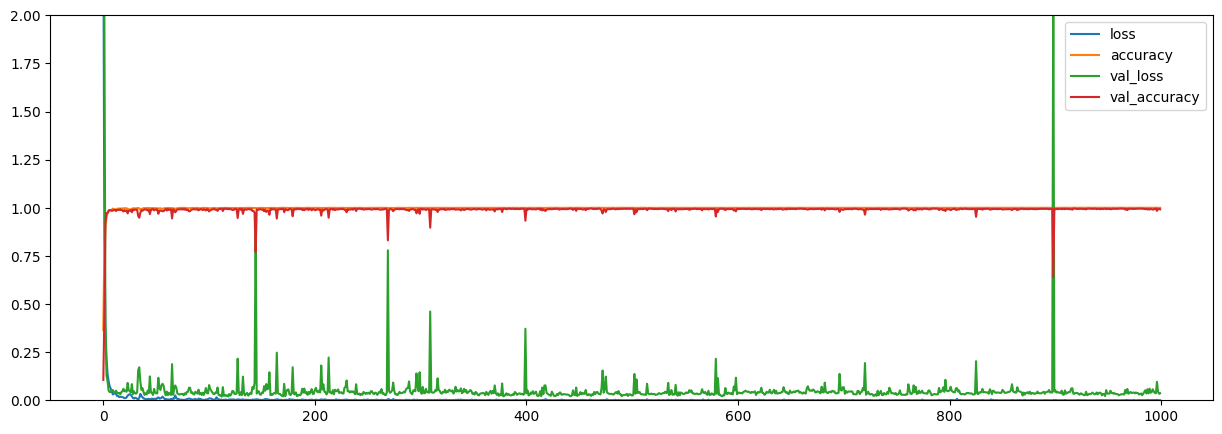

In [ ]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(15, 5))
plt.grid(False)
plt.gca().set_ylim(0, 2)
plt.show()

##Reducing images in Test data

In [ ]:
test_folder = r"C:\Users\Dhivya Dhrashini\Downloads\Images_test"
files = os.listdir(test_folder)

#Shuffle the file list
random.shuffle(files)

#Number of images to keep
num_images = 100

#Delete the excess images
for file_name in files[num_images:]:
    file_path = os.path.join(test_folder, file_name)
    if os.path.isfile(file_path):
        os.remove(file_path)


In [ ]:
# Folder path
folder_path = r"C:\Users\Dhivya Dhrashini\Downloads\Images_test"
# Create an empty list to store the file paths
file_paths = (os.path.join(root, file) for root, dirs, files in os.walk(folder_path) for file in files)

# Create a DataFrame from the file paths
df = pd.DataFrame({'Filename': file_paths})
df

In [ ]:
df1 = pd.read_csv(r"C:\Users\Dhivya Dhrashini\Downloads\FINALTEST.csv")
df1

In [ ]:
# Compare Filename column between df and df1
filenames_to_drop = df1[~df1['Filename'].isin(df['Filename'])]['Filename']

# Drop filenames from df1 that are not in df
df1 = df1[~df1['Filename'].isin(filenames_to_drop)]

# Optional: Reset the index of df1 after dropping rows
df1.reset_index(drop=True, inplace=True)
df1

In [ ]:
df1.to_csv(r"test_csv.csv", index=False)

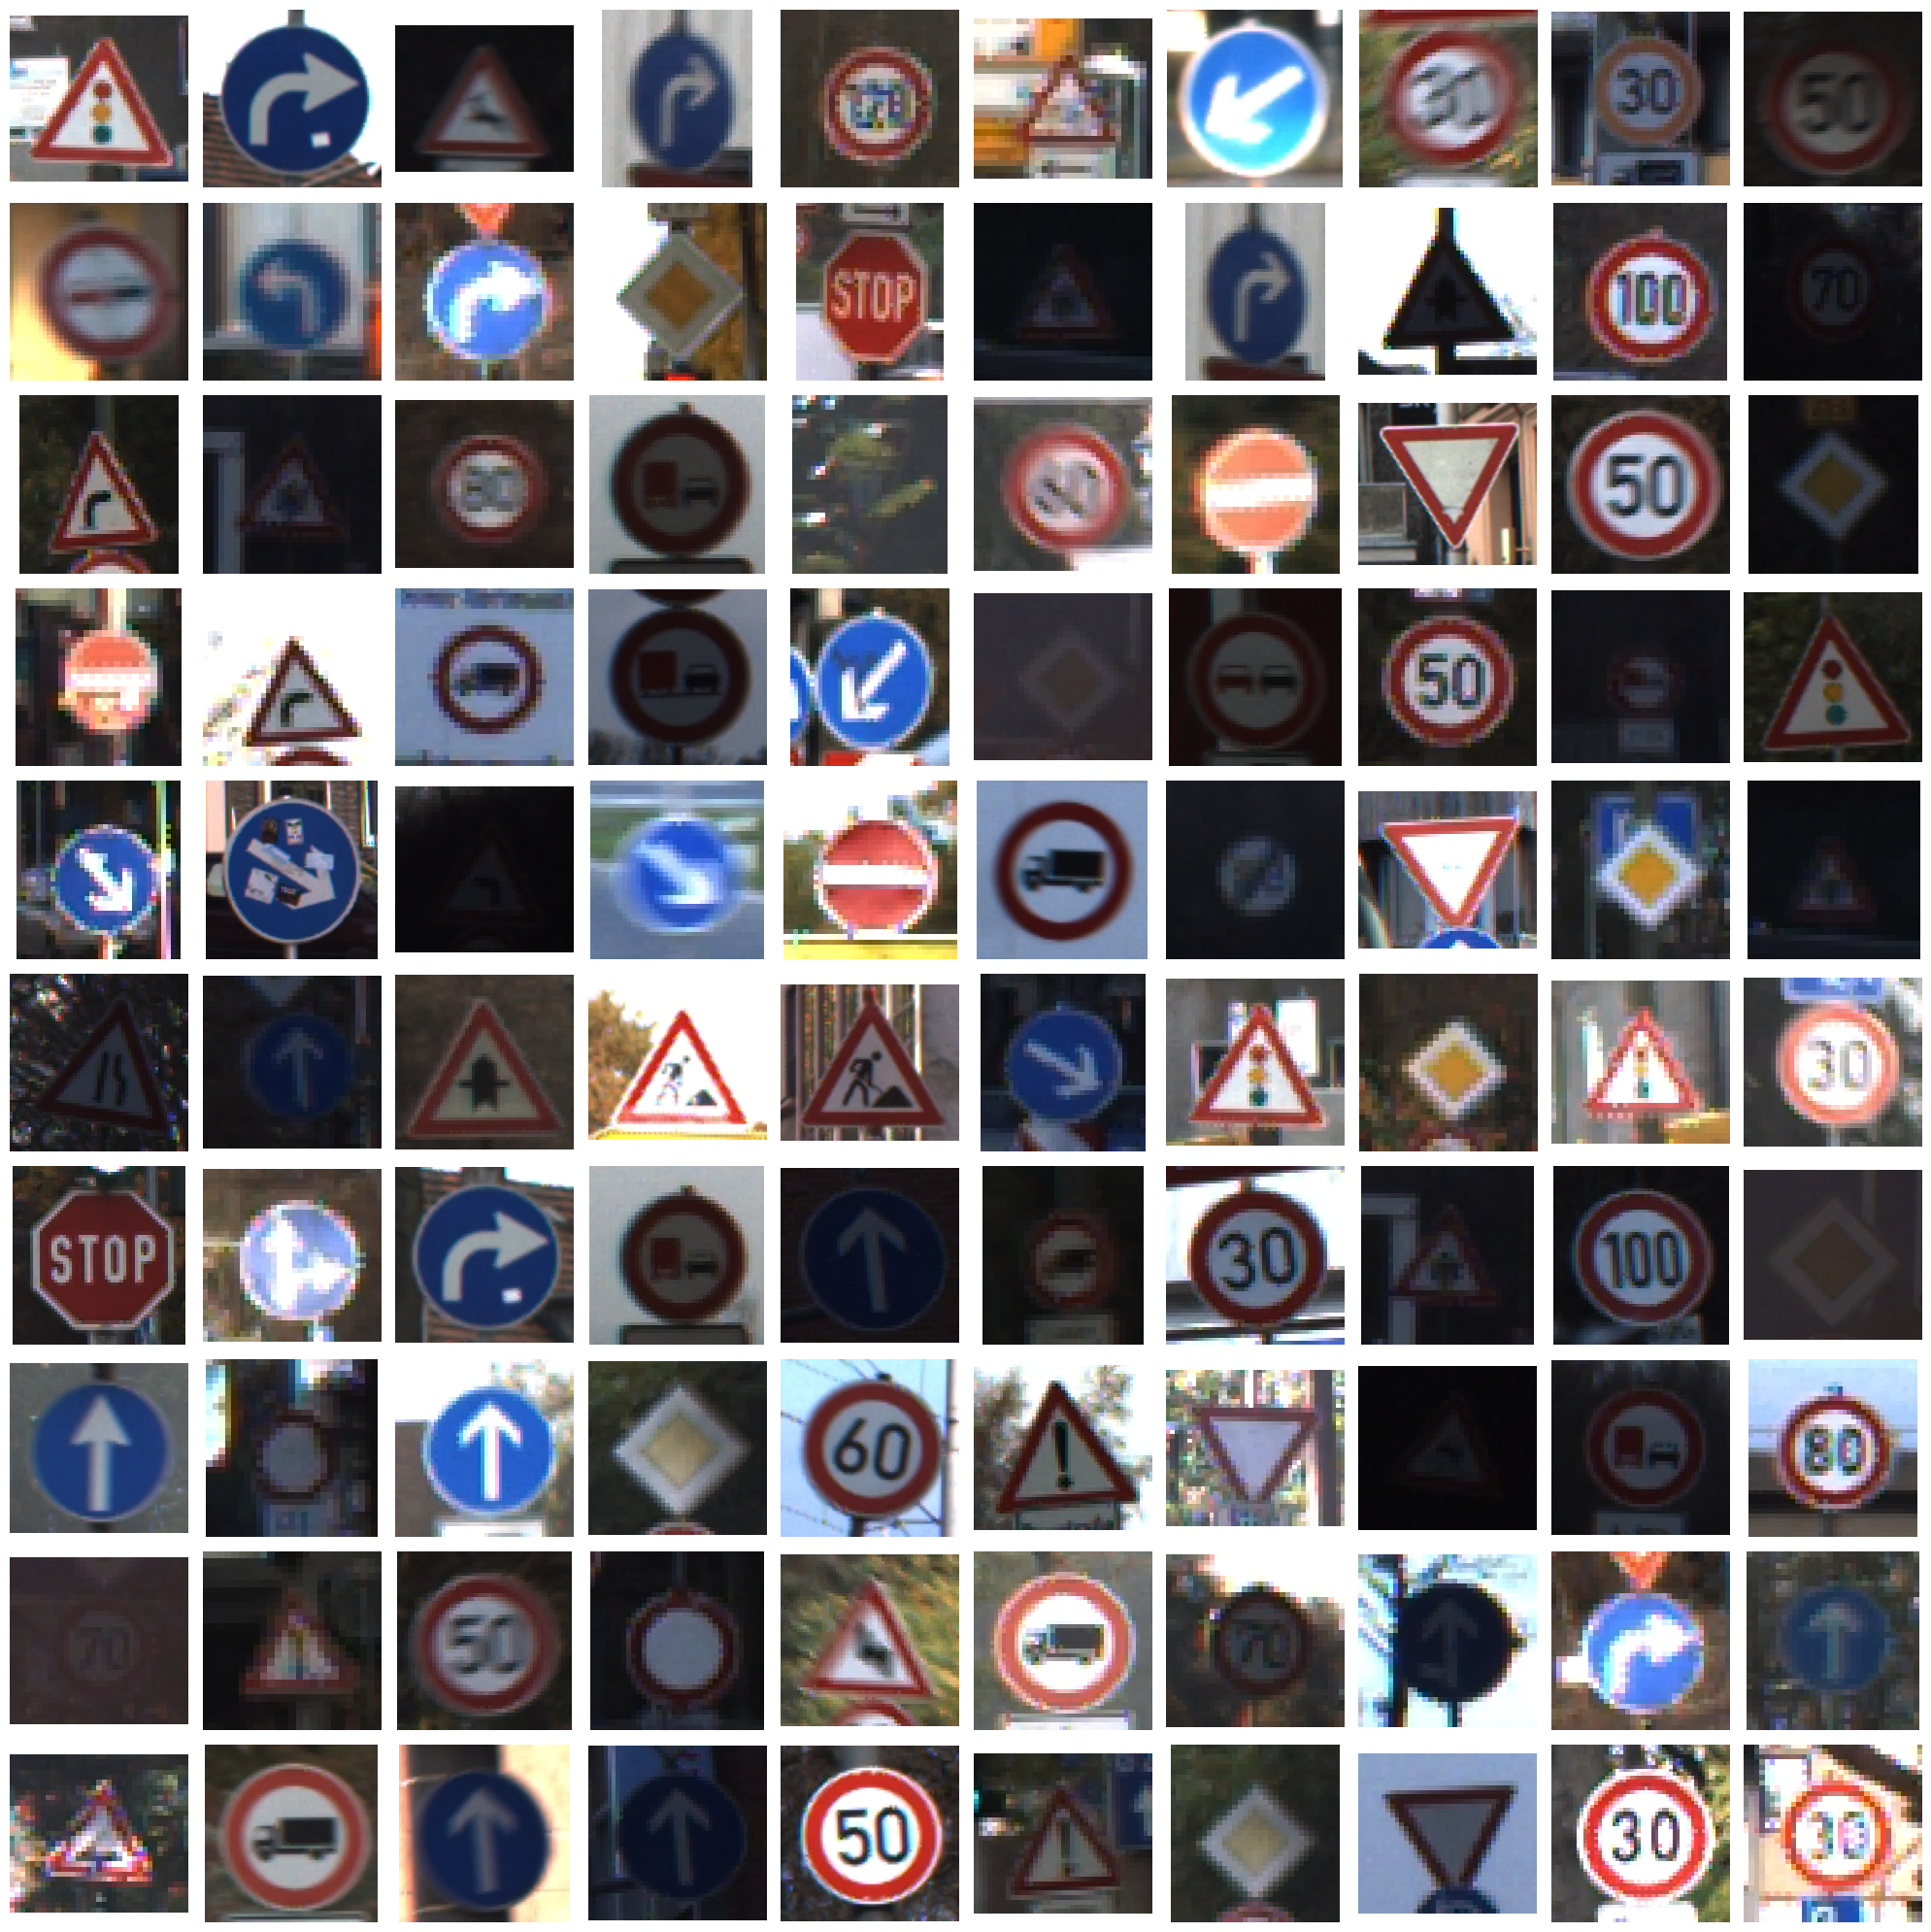

In [ ]:
import os
import glob
from PIL import Image

# Set the path to the image folder
image_folder = '/content/drive/MyDrive/Images_test'

# Get a list of image file paths in the folder
image_paths = glob.glob(os.path.join(image_folder, '*.ppm'))

# Iterate over the image paths and display the images
num_images = len(image_paths)
num_rows = (num_images + 9) // 10  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 10, figsize=(20, 2 * num_rows))

for i, image_path in enumerate(image_paths):
    # Open and display the image
    image = Image.open(image_path)
    ax = axes[i // 10, i % 10]
    ax.imshow(image)
    ax.axis('off')

# Adjust the layout and spacing of subplots
plt.tight_layout()
plt.show()

##Prediction of Test data

1/1 [==============================] - 0s 35ms/step


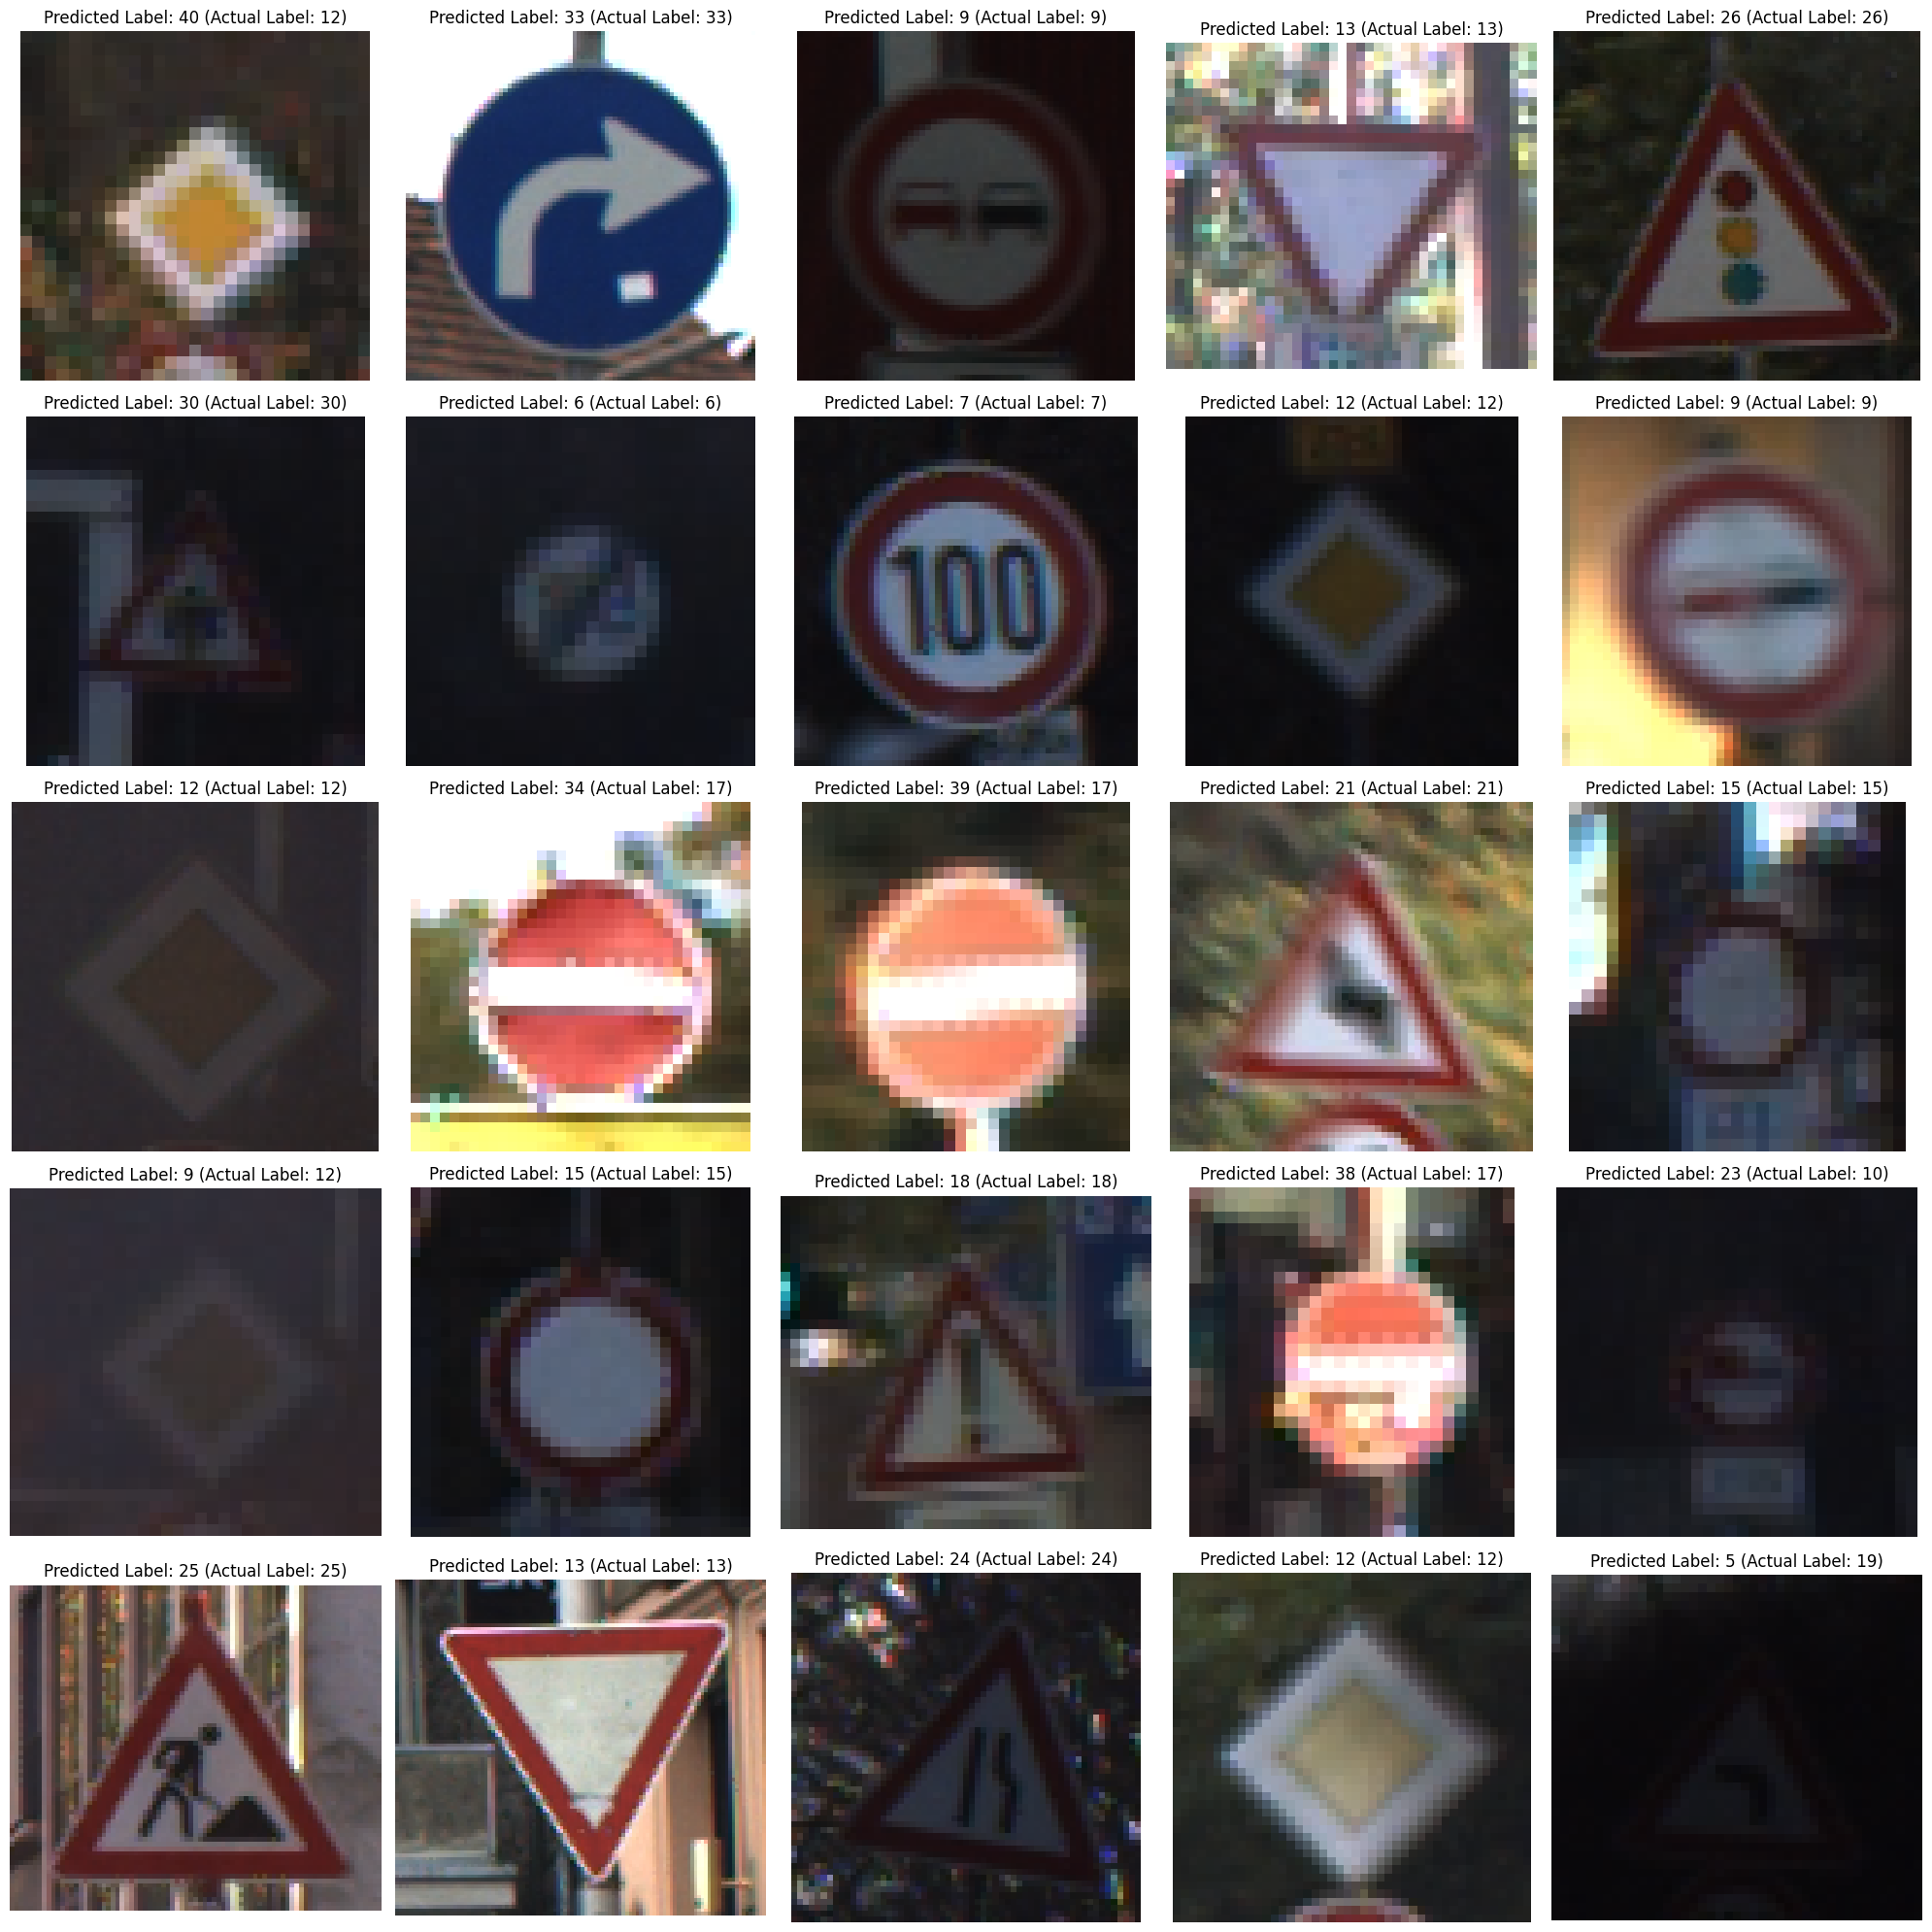

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np

csv_file = '/content/drive/MyDrive/test_csv_modified.csv'
df = pd.read_csv(csv_file)
class_ids = []  # Initialize an empty list to store class IDs

# Select 100 random images from the image_folder
image_files = os.listdir(image_folder)
random_images = random.sample(image_files, 25)
random_image_paths = [os.path.join(image_folder, image) for image in random_images]



resized_images = []
for image_path in random_image_paths:
    image_row = df.loc[df['Filename'] == image_path]
    class_id = image_row['ClassId'].values[0]
    class_ids.append(class_id)

    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (68, 68))
    resized_image = resized_image.astype('float32') / 255.0
    resized_images.append(resized_image)

# Convert the list of resized images to a NumPy array
x_test = np.array(resized_images)
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Plot and print all the randomly selected images and their predicted labels
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.flatten()

for i, (image_path, label) in enumerate(zip(random_image_paths, predicted_labels)):
    image = plt.imread(image_path)

    axes[i].imshow(image)
    axes[i].set_title("Predicted Label: {} (Actual Label: {})".format(label, class_ids[i]))
    axes[i].axis('off')


# Adjust the layout and spacing of subplots
plt.tight_layout()
plt.show()

In [ ]:
model.save("TrafficsignModel.h5")